In [93]:
!pip3 install networkx

In [94]:
!pip3 install matplotlib

In [95]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# Network Analysis

This group exercise is designed to develop an understanding of basic network measures and to start participants thinking about interesting research questions that can be enabled by network science.

<ol>
    <li>Divide yourselves into groups of four by counting off in order around the room.</li>
    <li>For 10 minutes, explore the <a href="https://icon.colorado.edu/#!/networks">Index of Complex Networks (ICON)</a> database and identify a network your group might like to investigate further.</li>
    <li>Write code to import this network into Python. Play with the <a href="https://networkx.github.io/documentation/stable/reference/algorithms/index.html">built-in functionality</a> of `networkx`. (See the code below for help with this step.)</li>
    <li>For 15 minutes, identify a possible research question using this data. Evaluate the strengths and weaknesses of this data.</li>
    <li>Outline a research design that could be used to address the weaknesses of the data you collected (e.g. think about possible data sets you could combine with this network), or otherwise improve your ability to answer the research question.</li>
</ol>

There is only one requirement: the group member with the least amount of experience coding should be responsible for typing the code into a computer. After 40 minutes you should be prepared to give a 3 minute presentation of your work. Remember that these daily exercises are for you to get to know each other better, are not expected to be fully-fleshed out research project, and a way for you to explore research areas that may be new to you.

## Importing ICON data

Visit the ICON website (<a href="https://icon.colorado.edu/#!/networks">link</a>). You can search the index using the checkboxes under the tabs "network domain," "subdomain," "graph properties," and "size". You can also type in keywords related to the network you would like to find. Here is a screenshot:

<img src="karate.png" width="500px" align="left"></img>

To download a network, click the small yellow downward arrow and follow the link listed under "source". Importing this data into Python using `networkx` will depend on the file type of the network you download. (Check out the <a href="https://networkx.github.io/documentation/stable/reference/readwrite/index.html">package's documentation</a> for how to import networks from different file types.) 

Here's what it looks like to import the Zachary Karate Club from the edglist provided:

In [96]:
with open('karate_edges_77.txt', 'rb') as file: 
    G = nx.read_edgelist(file) # read in the edges

groups = {}
with open('karate_groups.txt', 'r') as file:
    for line in file:
        [node, group] = re.split(r'\t+', line.strip())
        groups[node] = int(group)

nx.set_node_attributes(G, name = 'group', values = groups) # add attributes to the nodes (e.g. group membership)

## Introduction to `networkx`

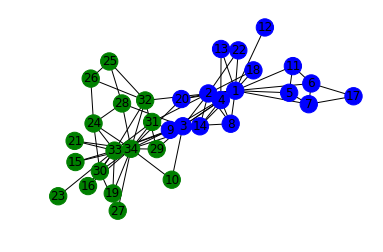

In [97]:
position = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos = position) 

colors = [] # color the nodes acording to their group
for attr in nx.get_node_attributes(G, 'group').values():
    if attr == 1: colors.append('blue') 
    else: colors.append('green')
        
nx.draw(G, position, node_color = colors) # visualize the graph 

In [98]:
degrees = nx.degree_centrality(G)  # to compute the degree centrality for all nodes in the graph
print(degrees)

{'1': 0.48484848484848486, '2': 0.2727272727272727, '3': 0.30303030303030304, '4': 0.18181818181818182, '5': 0.09090909090909091, '6': 0.12121212121212122, '7': 0.12121212121212122, '8': 0.12121212121212122, '9': 0.15151515151515152, '11': 0.09090909090909091, '12': 0.030303030303030304, '13': 0.06060606060606061, '14': 0.15151515151515152, '18': 0.06060606060606061, '20': 0.09090909090909091, '22': 0.06060606060606061, '32': 0.18181818181818182, '31': 0.12121212121212122, '10': 0.06060606060606061, '28': 0.12121212121212122, '29': 0.09090909090909091, '33': 0.36363636363636365, '17': 0.06060606060606061, '34': 0.48484848484848486, '15': 0.06060606060606061, '16': 0.06060606060606061, '19': 0.06060606060606061, '21': 0.06060606060606061, '23': 0.030303030303030304, '24': 0.15151515151515152, '26': 0.09090909090909091, '30': 0.12121212121212122, '25': 0.09090909090909091, '27': 0.06060606060606061}


In [99]:
assort = nx.attribute_assortativity_coefficient(G, 'group') # calculate the network assortativity
print(assort)

0.7135125993573483
